In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(1)

In [2]:
data = pd.read_csv('train.csv')

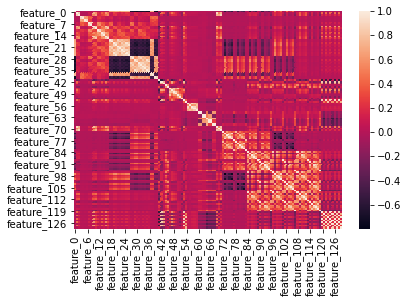

In [3]:
features = ['feature_' + str(i) for i in range(130)]
corr = data[features].corr()
sns.heatmap(corr)

In [4]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data[features].columns[columns]

In [ ]:
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(data.dropna()[selected_columns].values, data.dropna()['resp'].values, SL, selected_columns)

In [ ]:
result = pd.DataFrame()
result['pnl'] = data['resp']

fig = plt.figure(figsize = (20, 25))
j = 0
for i in data[selected_columns].columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(data[i][result['pnl']>0], color='g', label = 'gain')
    sns.distplot(data[i][result['pnl']<0], color='r', label = 'loss')
    plt.legend(loc='best')
fig.suptitle('PnL')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()